In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
pred = tf.add(tf.multiply(X,W), b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.200476304 W= 0.44607124 b= -0.6119793
Epoch: 0100 cost= 0.186208323 W= 0.4343858 b= -0.5279157
Epoch: 0150 cost= 0.173587829 W= 0.42339534 b= -0.44885075
Epoch: 0200 cost= 0.162424803 W= 0.41305852 b= -0.3744885
Epoch: 0250 cost= 0.152551085 W= 0.4033365 b= -0.30454916
Epoch: 0300 cost= 0.143817678 W= 0.3941927 b= -0.23876941
Epoch: 0350 cost= 0.136092991 W= 0.3855927 b= -0.17690164
Epoch: 0400 cost= 0.129260480 W= 0.3775043 b= -0.11871348
Epoch: 0450 cost= 0.123217247 W= 0.36989677 b= -0.06398593
Epoch: 0500 cost= 0.117872097 W= 0.36274177 b= -0.012513382
Epoch: 0550 cost= 0.113144465 W= 0.3560123 b= 0.035897866
Epoch: 0600 cost= 0.108962975 W= 0.3496832 b= 0.08142985
Epoch: 0650 cost= 0.105264656 W= 0.34373024 b= 0.12425385
Epoch: 0700 cost= 0.101993628 W= 0.3381316 b= 0.1645309
Epoch: 0750 cost= 0.099100612 W= 0.33286572 b= 0.20241255
Epoch: 0800 cost= 0.096541904 W= 0.32791317 b= 0.23804125
Epoch: 0850 cost= 0.094278924 W= 0.32325506 b= 0.27155095
Epoch: 0900 co

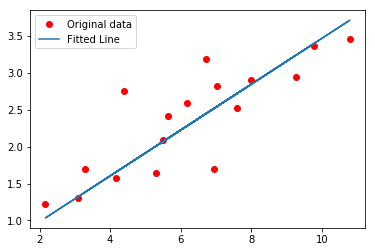

Testing... (Mean square loss Comparison)
Testing cost= 0.08026316
Absolute mean square loss difference: 0.008678861


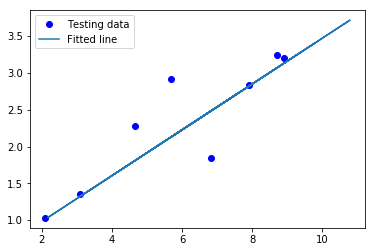

In [8]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y })
            
        if(epoch+1) % display_step ==0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                 "W=", sess.run(W), "b=", sess.run(b))
            
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()
    
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()